In [1]:
import torch.nn as nn
import pandas as pd
import json
import os
import numpy as np
import pickle
import json
import scipy
from torch.utils.data import Dataset, DataLoader
import torch
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# define random seeds for Neural Networks
torch.manual_seed(0)
np.random.seed(0)

# ignore warnings jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load config file
with open('../utils/configs.json') as f:
    config = json.load(f)

In [3]:
# laod outlier scores
outlier_score_path = '../results/hauge/outlier_scores/AE'

In [4]:
def base_df(start_date = '2018-01-01', end_date = '2020-03-31'):
    # generate all the dates between start and end date with 5 minutes interval
    dates = pd.date_range(start_date, end_date, freq='5min')
    df = pd.DataFrame(index=dates)
    df.index.name = 'timestamp'
    return df

In [5]:
correlated_results = {}
# for each trajectory, direction and intersection, run AE model
for trajectory in config['trajectories']:
    correlated_results[trajectory] = {}
    for direction in config['trajectories'][trajectory]:
        print(trajectory, direction)
        df = base_df()
        for intersection in config['trajectories'][trajectory][direction]:
            file_path = os.path.join(outlier_score_path,intersection+'_'+direction+'.csv')
            df_intersection = pd.read_csv(file_path) # load outlier scores
            df_intersection['timestamp'] = pd.to_datetime(df_intersection['timestamp']) # convert timestamp to datetime
            df_intersection.set_index('timestamp',inplace=True) # set timestamp as index
            df_intersection = df_intersection.rename(columns={'outlier_score':intersection})
            df = df.merge(df_intersection, on='timestamp', how='inner') # merge outlier scores with base df
        # save the results
        correlated_results[trajectory][direction]= df


T1 North
T1 South
T2 South
T2 North


In [6]:
# save the results as pickle file
with open('../results/hauge/outlier_scores/AE/correlated_results.pickle', 'wb') as f:
    pickle.dump(correlated_results,f)

In [7]:
def plot_heatmap(df, trajectory,direction):
    fig, ax = plt.subplots(facecolor='w')
    sns.heatmap(df.corr())
    plt.title(f"Correlations for {trajectory} {direction}")
    plt.xlabel('Intersection')
    plt.ylabel('Intersection')
    plt.show()
    return

T1 North


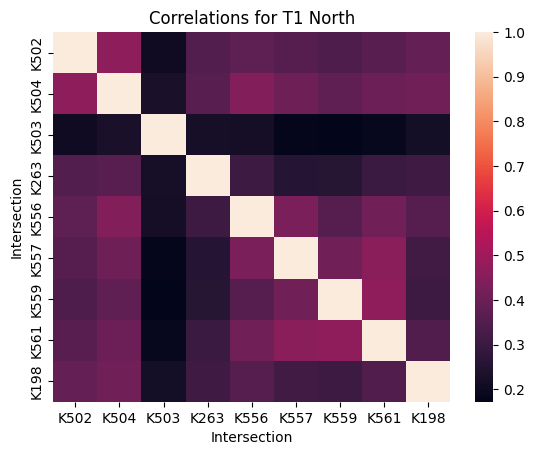

T1 South


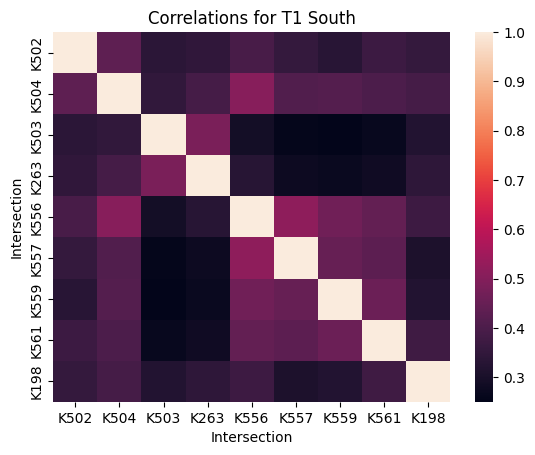

T2 South


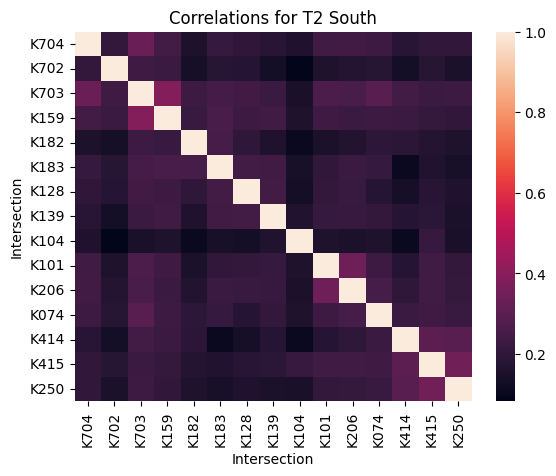

T2 North


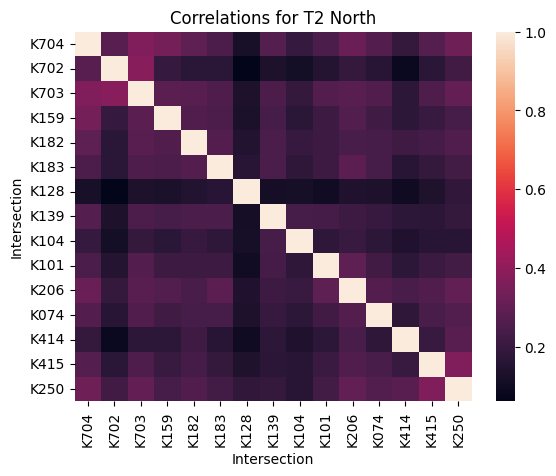

In [8]:
for trajectory in correlated_results.keys():
    for direction in correlated_results[trajectory].keys():
        print(trajectory,direction)
        df = correlated_results[trajectory][direction]
        plot_heatmap(df, trajectory,direction)

T1 North


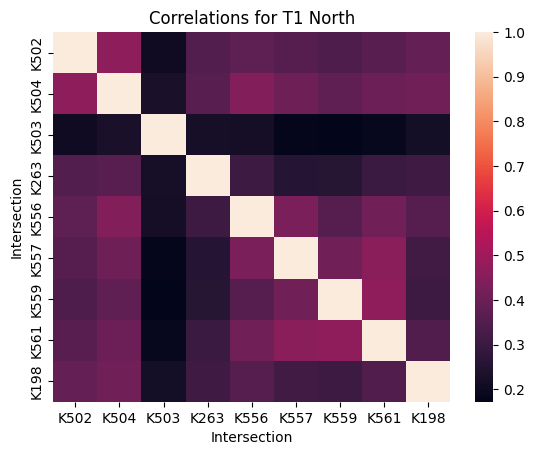

T1 South


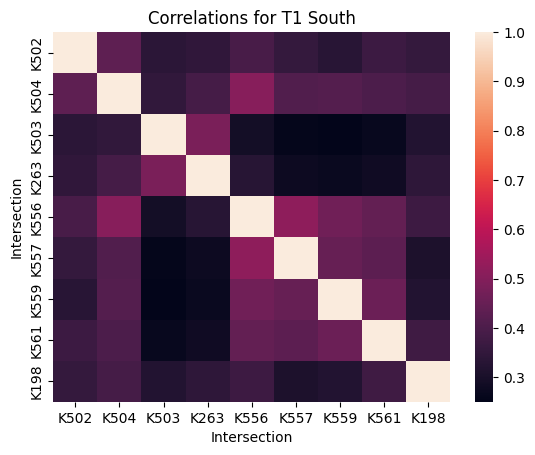

T2 South


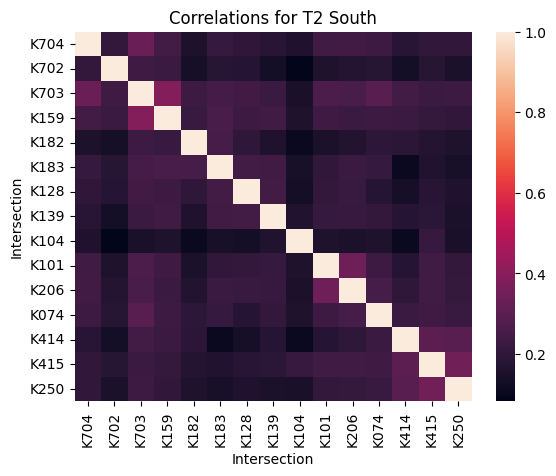

T2 North


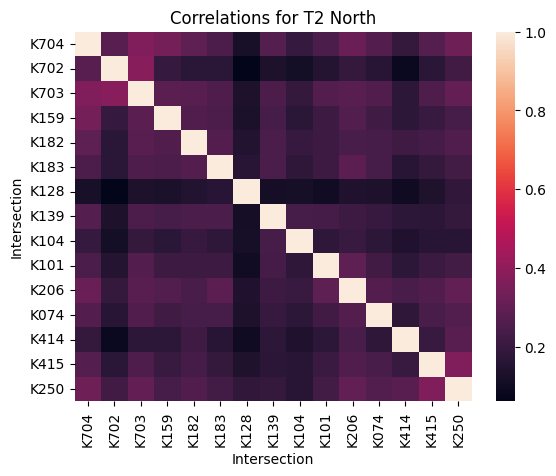

In [9]:
for trajectory in correlated_results.keys():
    for direction in correlated_results[trajectory].keys():
        print(trajectory,direction)
        df = correlated_results[trajectory][direction]
        plot_heatmap(df, trajectory,direction)

In [10]:
correlated_results['T1']['North'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.467879,0.205961,0.347915,0.374678,0.358842,0.343019,0.360022,0.387145
K504,0.467879,1.000000,0.229657,0.363494,0.445694,0.403454,0.378932,0.401593,0.414819
K503,0.205961,0.229657,1.000000,0.224228,0.218561,0.180930,0.172520,0.186258,0.215684
K263,0.347915,0.363494,0.224228,1.000000,0.304129,0.255536,0.257921,0.299965,0.311072
K556,0.374678,0.445694,0.218561,0.304129,1.000000,0.429924,0.357567,0.409966,0.357951
K557,0.358842,0.403454,0.180930,0.255536,0.429924,1.000000,0.410823,0.459775,0.316825
K559,0.343019,0.378932,0.172520,0.257921,0.357567,0.410823,1.000000,0.471462,0.303605
K561,0.360022,0.401593,0.186258,0.299965,0.409966,0.459775,0.471462,1.000000,0.345092
K198,0.387145,0.414819,0.215684,0.311072,0.357951,0.316825,0.303605,0.345092,1.000000


In [11]:
correlated_results['T1']['South'].corr()

,K502,K504,K503,K263,K556,K557,K559,K561,K198
K502,1.000000,0.433775,0.335974,0.345879,0.392440,0.353889,0.330710,0.369878,0.353142
K504,0.433775,1.000000,0.349135,0.385760,0.505960,0.408861,0.415522,0.402127,0.386997
K503,0.335974,0.349135,1.000000,0.483158,0.290627,0.258347,0.250040,0.266986,0.317836
K263,0.345879,0.385760,0.483158,1.000000,0.327050,0.276211,0.269390,0.279695,0.343244
K556,0.392440,0.505960,0.290627,0.327050,1.000000,0.517084,0.465315,0.440925,0.370675
K557,0.353889,0.408861,0.258347,0.276211,0.517084,1.000000,0.448017,0.430483,0.307604
K559,0.330710,0.415522,0.250040,0.269390,0.465315,0.448017,1.000000,0.455135,0.318403
K561,0.369878,0.402127,0.266986,0.279695,0.440925,0.430483,0.455135,1.000000,0.374921
K198,0.353142,0.386997,0.317836,0.343244,0.370675,0.307604,0.318403,0.374921,1.000000


In [12]:
correlated_results['T2']['North'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.274220,0.364034,0.342004,0.289905,0.251795,0.120856,0.269615,0.195063,0.245818,0.317705,0.264935,0.190332,0.268059,0.322520
K702,0.274220,1.000000,0.381637,0.195563,0.165949,0.165231,0.061611,0.134721,0.109495,0.151068,0.193108,0.162756,0.087424,0.164252,0.223593
K703,0.364034,0.381637,1.000000,0.282673,0.281325,0.255097,0.132459,0.249463,0.193549,0.265226,0.280306,0.257884,0.174353,0.254140,0.301384
K159,0.342004,0.195563,0.282673,1.000000,0.259515,0.251675,0.129583,0.235254,0.166613,0.212680,0.261087,0.221379,0.175083,0.203229,0.237229
K182,0.289905,0.165949,0.281325,0.259515,1.000000,0.264719,0.147611,0.247584,0.200443,0.212179,0.242283,0.235008,0.218231,0.233360,0.259074
K183,0.251795,0.165231,0.255097,0.251675,0.264719,1.000000,0.164001,0.245020,0.176212,0.210399,0.286915,0.234203,0.161709,0.189948,0.229495
K128,0.120856,0.061611,0.132459,0.129583,0.147611,0.164001,1.000000,0.115929,0.118632,0.104296,0.138978,0.134432,0.101342,0.135067,0.183039
K139,0.269615,0.134721,0.249463,0.235254,0.247584,0.245020,0.115929,1.000000,0.234357,0.231896,0.214741,0.200385,0.172946,0.168990,0.191508
K104,0.195063,0.109495,0.193549,0.166613,0.200443,0.176212,0.118632,0.234357,1.000000,0.176737,0.202606,0.172946,0.139669,0.161551,0.163142
K101,0.245818,0.151068,0.265226,0.212680,0.212179,0.210399,0.104296,0.231896,0.176737,1.000000,0.292145,0.225558,0.173567,0.206110,0.227966


In [13]:
correlated_results['T2']['South'].corr()

,K704,K702,K703,K159,K182,K183,K128,K139,K104,K101,K206,K074,K414,K415,K250
K704,1.000000,0.207181,0.331464,0.247450,0.152902,0.213164,0.198733,0.181475,0.159180,0.238935,0.243604,0.226828,0.179696,0.201717,0.204088
K702,0.207181,1.000000,0.236889,0.224375,0.139641,0.177422,0.173443,0.130035,0.082977,0.156545,0.170161,0.179693,0.129881,0.176291,0.148836
K703,0.331464,0.236889,1.000000,0.387783,0.228758,0.250775,0.240927,0.223264,0.146685,0.266444,0.259988,0.293955,0.247213,0.224990,0.228987
K159,0.247450,0.224375,0.387783,1.000000,0.220161,0.258692,0.231828,0.239069,0.156018,0.234089,0.224694,0.233097,0.225622,0.209118,0.203770
K182,0.152902,0.139641,0.228758,0.220161,1.000000,0.253387,0.194403,0.158549,0.109348,0.149814,0.166352,0.191918,0.188629,0.169711,0.157264
K183,0.213164,0.177422,0.250775,0.258692,0.253387,1.000000,0.246308,0.241915,0.140673,0.203875,0.222936,0.212883,0.105021,0.165337,0.140691
K128,0.198733,0.173443,0.240927,0.231828,0.194403,0.246308,1.000000,0.246814,0.132815,0.208137,0.222658,0.174633,0.138532,0.181120,0.161137
K139,0.181475,0.130035,0.223264,0.239069,0.158549,0.241915,0.246814,1.000000,0.164715,0.213640,0.218914,0.207267,0.172971,0.186103,0.149185
K104,0.159180,0.082977,0.146685,0.156018,0.109348,0.140673,0.132815,0.164715,1.000000,0.155880,0.147504,0.157812,0.106513,0.217966,0.144376
K101,0.238935,0.156545,0.266444,0.234089,0.149814,0.203875,0.208137,0.213640,0.155880,1.000000,0.343515,0.232662,0.174405,0.238755,0.205547
